In [1]:
import os

if os.getcwd().split("/")[-1] != "neurolib":
    os.chdir('..')

os.chdir('..')
datadir = os.path.join(os.getcwd(), "neurolib", "wohle-brain")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [3]:
data = dict()
coords = [[1.7, 0.1], [1.6, 0.1]]

N = 100
data = dict()
data["coordinates"] = coords

folders = ["NAP_002", "NAP_003", "NAP_005", "NAP_007", "NAP_009", "NAP_010", "NAP_011", "NAP_012", "NAP_013", "NAP_014", "NAP_015", "NAP_016", "NAP_018", "NAP_020", "NAP_022", "NAP_024", "NAP_025", "NAP_026", "NAP_027", "NAP_028", "NAP_029", "NAP_031", "NAP_032", "NAP_033", "NAP_035", "NAP_036"]
cmat_sum = np.zeros((N,N))
dmat_sum = np.zeros((N,N))

for f in folders:
    path = os.path.join(os.getcwd(), "data", "structural_data", "Sch100", f, "SC", "DTI_CM.mat")
    cmat_sum += scipy.io.loadmat(path)["SC"]
    path = os.path.join(os.getcwd(), "data", "structural_data", "Sch100", f, "SC", "DTI_LEN.mat")
    dmat_sum += scipy.io.loadmat(path)["LEN"]

cmat_av = cmat_sum/len(folders)
dmat_av = dmat_sum/len(folders)

------------------- seed =  1


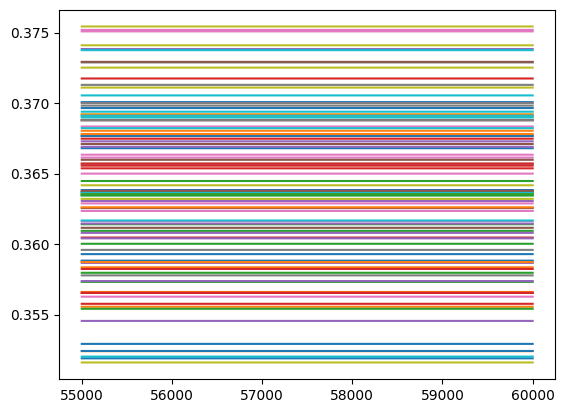

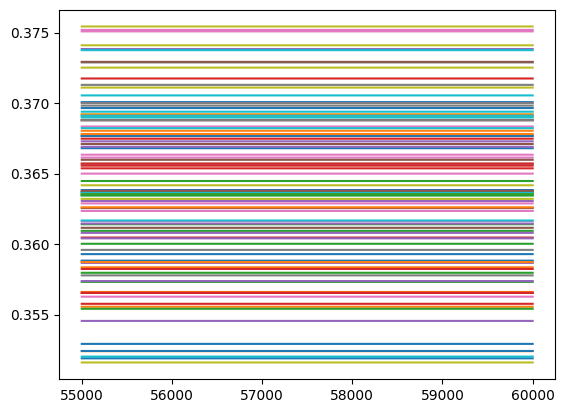

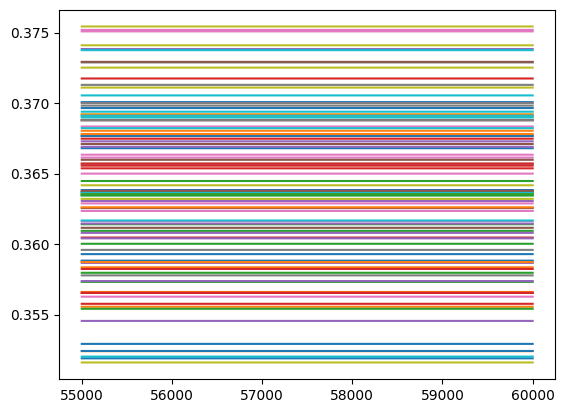

------------------- seed =  6


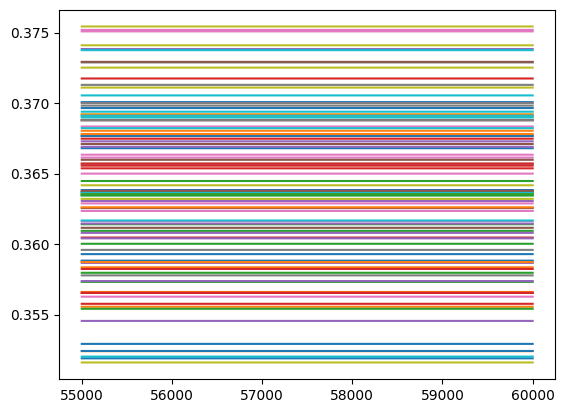

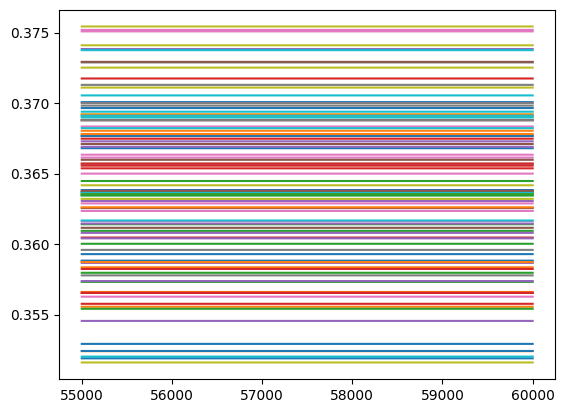

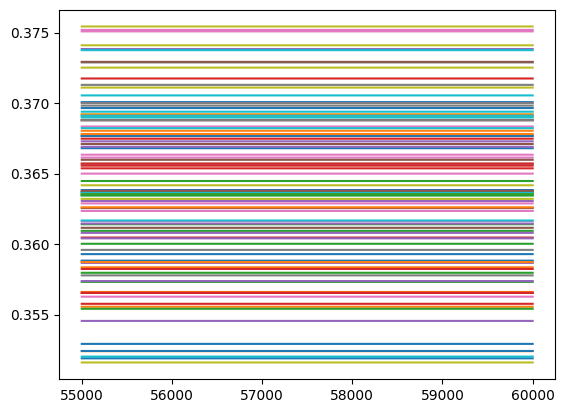

------------------- seed =  11


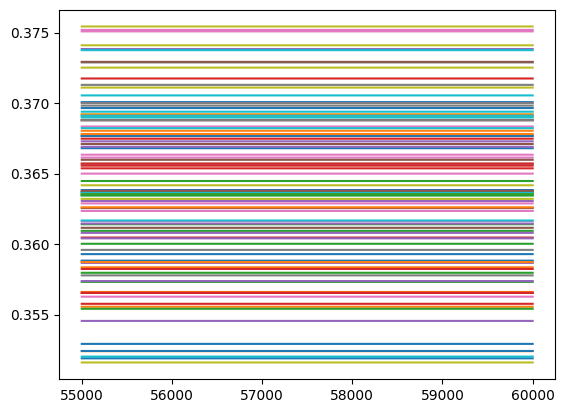

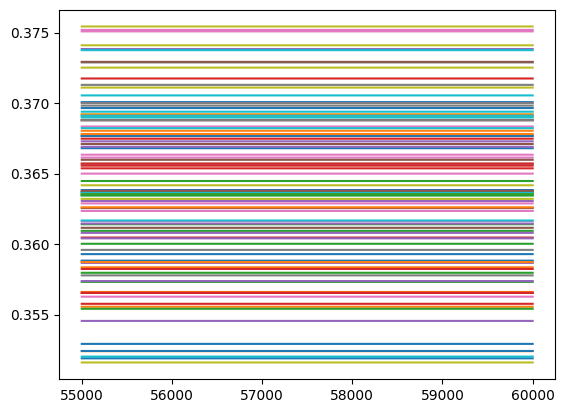

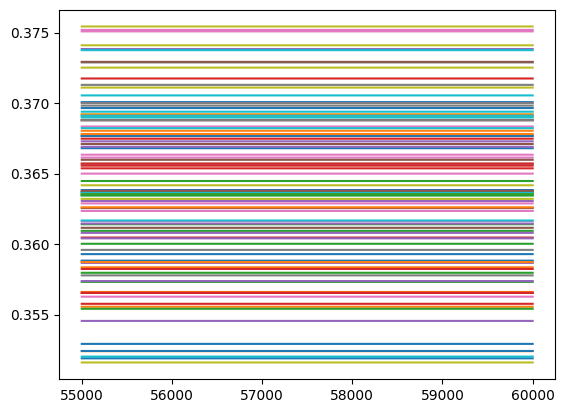

------------------- seed =  16


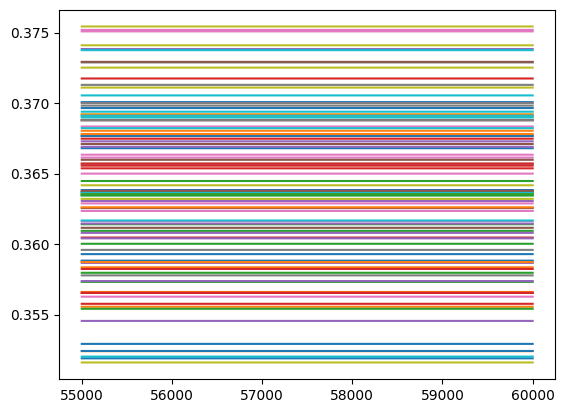

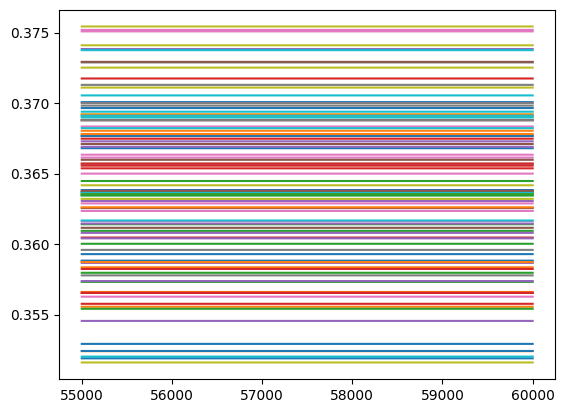

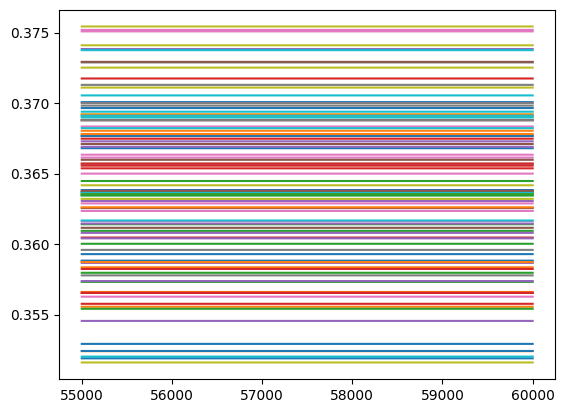

In [15]:
for s in range(1, 20, 5):

    print("------------------- seed = ", s)

    model = WCModel(Cmat=cmat_av, Dmat=dmat_av, seed=s)
    testd = 60.*1e3
    dt = model.params.dt
    model.params.duration = testd
    model.params.seed = 0

    model.params.c_excinh = 12  # local E-I coupling

    model.params.signalV = 80.0
    model.params.K_gl = 0.5  # global coupling strength
    model.params.a_exc = 1.  # excitatory gain
    model.params.a_inh = 1.  # inhibitory gain
    model.params.mu_exc = 5.0  # excitatory firing threshold
    model.params.mu_inh = 5.0  # inhibitory firing threshold

    zero_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
    input = zero_input.copy()
    input[0,int(10.*1e3/dt):int(15.*1e3/dt)] = 1.

    model.params.exc_ext_baseline = data["coordinates"][1][0]
    model.params.exc_inh_baseline = data["coordinates"][1][1]

    for factor in np.arange(0.1, 1., 0.4):
        model.params.exc_ext = factor * input
        model.run()

        for n in range(N):
            plt.plot(model.t[-50000:], model.exc[n,-50000:])

        plt.show()

1.6 0


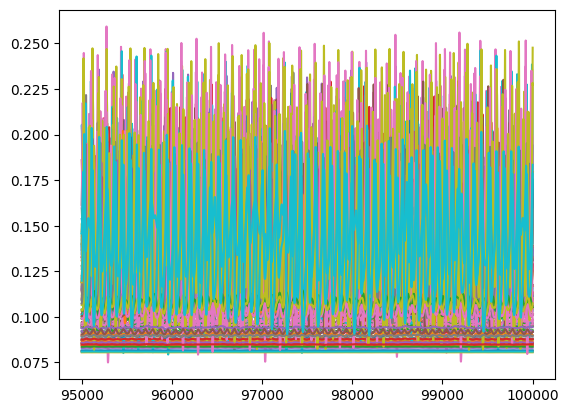

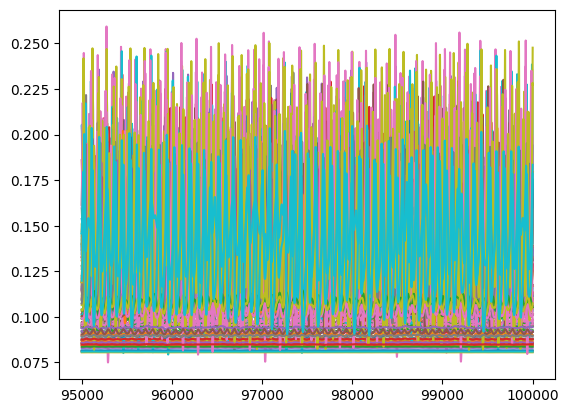

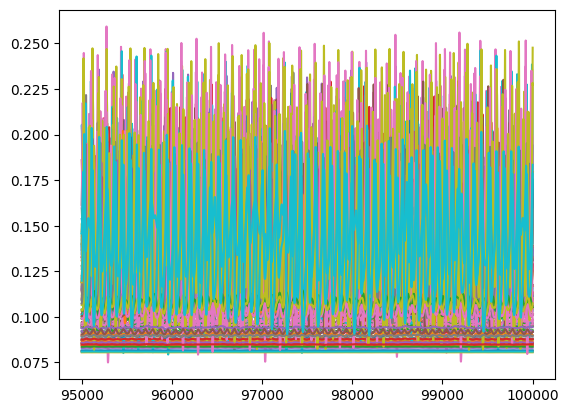

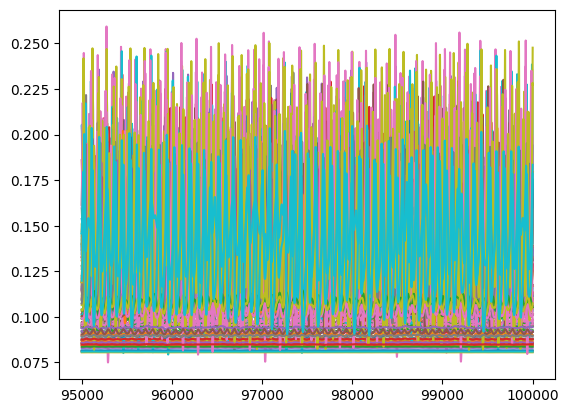

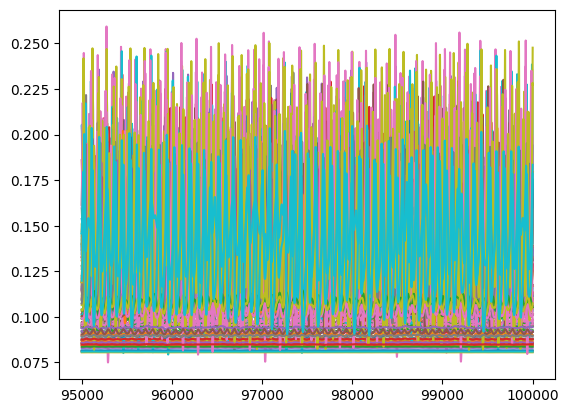

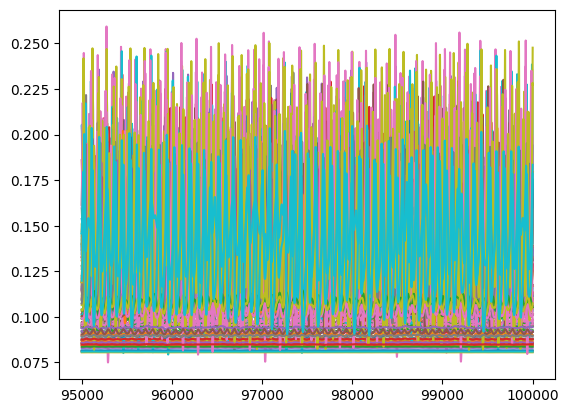

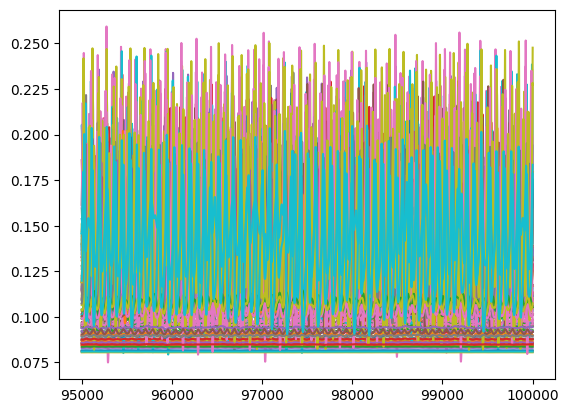

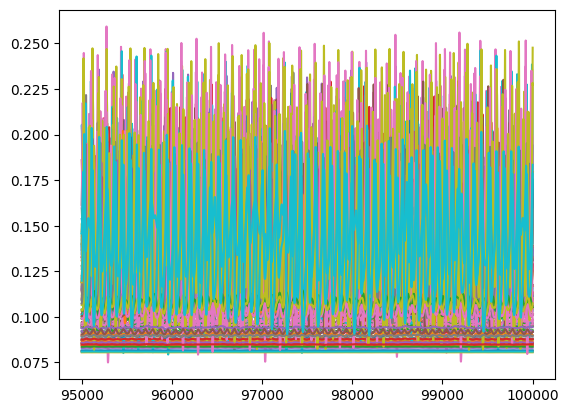

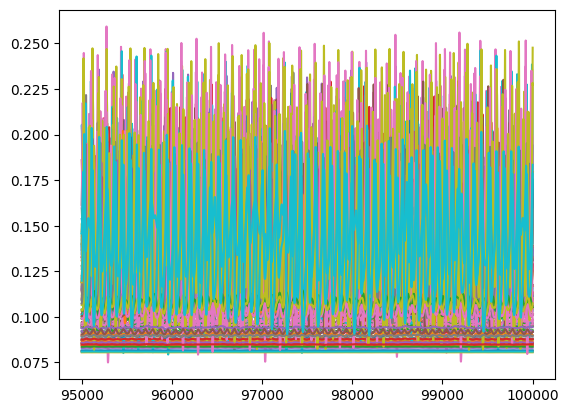

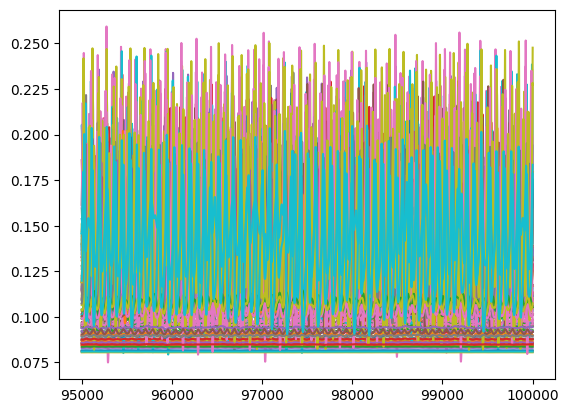

In [8]:


# fix seed
# try different stimuli
# try stimuli later. 
# try different seeds